# Exploratory Data Analysis (EDA) of Zillow Data
In this notebook initial EDA is conducted on the Zillow data set.

## Import required packages

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import processed data
- Columns are in lower case
- Zip code column renamed to zip
- Index set to date column in datetime format

In [272]:
zill = pd.read_csv('../data/processed/zillow_time_index.csv', index_col=0)

In [273]:
zill.index = pd.to_datetime(zill.index)

In [274]:
zill.zip = zill.zip.apply(lambda z: str(z))

In [275]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [276]:
zill.head()

,regionid,zip,city,state,metro,countyname,sizerank,value
date,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


## Below, each feature is analyzed for the data set in turn
Prior to creating any models, each feature is assessed to discover if there are any underlying issues affecting feature selection in this data set.

In [277]:
zill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   regionid    int64  
 1   zip         object 
 2   city        object 
 3   state       object 
 4   metro       object 
 5   countyname  object 
 6   sizerank    int64  
 7   value       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 267.9+ MB


After initial research, Zillow defines 'sizerank' as the average house price per state divided by the population of that state.

## Datetime Index

In [278]:
len(zill.index.value_counts())

265

__Key Takeaway__ The original data set included 265 columns for months and years with the associated price of a house.  As such, the value counts for features in the EDA for this data set must be divided by 265 to assure accurate actual counts.

### RegionID

In [279]:
zill.regionid.value_counts()/265

63457    1.0
92897    1.0
60113    1.0
99067    1.0
74479    1.0
        ... 
89457    1.0
99690    1.0
77180    1.0
60740    1.0
69666    1.0
Name: regionid, Length: 14723, dtype: float64

In [280]:
(zill.regionid.value_counts().min()/265), (zill.regionid.value_counts().max()/265)

(1.0, 1.0)

__Key Takeaway__ This value is unique to all values and therefore adds no value.  It will be removed after the comparison of regions against one another.  As such, this column is added the the 'kill_cols' list for ulitmate deletion.

In [281]:
zill.metro.value_counts()

New York                          206435
Los Angeles-Long Beach-Anaheim     91955
Chicago                            86125
Philadelphia                       74465
Washington                         65985
                                   ...  
Eagle Pass                           265
Paragould                            265
Silver City                          265
Dodge City                           265
Grants                               265
Name: metro, Length: 701, dtype: int64

In [282]:
kill_cols = ['regionid']

## Zip

In [283]:
(zill.zip.value_counts().min()/265), (zill.zip.value_counts().max()/265)

(1.0, 1.0)

In [284]:
zill.zip.value_counts()

11726    265
96782    265
98840    265
90402    265
45505    265
        ... 
2021     265
56628    265
17313    265
15229    265
31401    265
Name: zip, Length: 14723, dtype: int64

__Key Takeaway__  This is the value for which we are picking the "best" performers.  As such it will be kept for EDA purposes.

## City

In [285]:
(zill.city.value_counts().min()/265), (zill.city.value_counts().max()/265)

(1.0, 114.0)

In [286]:
zill.city.value_counts()

New York            30210
Los Angeles         25175
Houston             23320
San Antonio         12720
Washington          11925
                    ...  
Walkerville           265
Florence-Graham       265
Commercial Point      265
Seabeck               265
Ball Ground           265
Name: city, Length: 7554, dtype: int64

## State

In [287]:
(zill.state.value_counts().min()/265), (zill.state.value_counts().max()/265)

(16.0, 1224.0)

In [288]:
zill.state.value_counts()/265

CA    1224.0
NY    1015.0
TX     989.0
PA     831.0
FL     785.0
OH     588.0
IL     547.0
NJ     502.0
MI     499.0
IN     428.0
NC     428.0
MA     417.0
TN     404.0
VA     401.0
MN     375.0
GA     345.0
WA     341.0
WI     332.0
MO     319.0
MD     317.0
CO     249.0
KS     241.0
AZ     230.0
OR     224.0
OK     221.0
SC     206.0
NH     199.0
LA     193.0
AL     183.0
IA     158.0
MS     153.0
KY     139.0
CT     124.0
UT     121.0
ID     110.0
AR     105.0
NV     103.0
ME      86.0
NE      83.0
WV      72.0
MT      71.0
HI      62.0
NM      60.0
RI      59.0
DE      41.0
ND      31.0
WY      31.0
AK      28.0
SD      19.0
DC      18.0
VT      16.0
Name: state, dtype: float64

## Metro

In [289]:
(zill.metro.value_counts().min()/265), (zill.metro.value_counts().max()/265)

(1.0, 779.0)

In [290]:
zill.metro.value_counts()/265

New York                          779.0
Los Angeles-Long Beach-Anaheim    347.0
Chicago                           325.0
Philadelphia                      281.0
Washington                        249.0
                                  ...  
Eagle Pass                          1.0
Paragould                           1.0
Silver City                         1.0
Dodge City                          1.0
Grants                              1.0
Name: metro, Length: 701, dtype: float64

## CountyName

In [291]:
(zill.countyname.value_counts().min()/265), (zill.countyname.value_counts().max()/265)

(1.0, 264.0)

In [292]:
zill.countyname.value_counts()/265

Los Angeles    264.0
Jefferson      175.0
Orange         166.0
Washington     164.0
Montgomery     159.0
               ...  
Randall          1.0
Weston           1.0
Lynn             1.0
Meade            1.0
Camp             1.0
Name: countyname, Length: 1212, dtype: float64

## SizeRank

In [293]:
zill.sizerank.min(), zill.sizerank.max()

(1, 14723)

In [294]:
zill.sizerank

date
1996-04-01        1
1996-04-01        2
1996-04-01        3
1996-04-01        4
1996-04-01        5
              ...  
2018-04-01    14719
2018-04-01    14720
2018-04-01    14721
2018-04-01    14722
2018-04-01    14723
Name: sizerank, Length: 3901595, dtype: int64

## Value

In [295]:
zill.value.min(), zill.value.max()

(11300.0, 19314900.0)

In [296]:
type(zill.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Let's first explore all house values by year in the data set

In [297]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [298]:
yearly = zill.groupby([zill.index.year, zill.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

In [299]:
yearly.index.get_level_values(0)

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=338629)

In [300]:
sns.set()

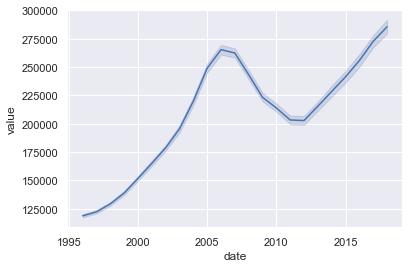

In [301]:
yearly_lineplot = sns.lineplot(x = yearly.index.get_level_values(0), 
                               y = 'value', 
                               data = yearly);

In [302]:
fig = yearly_lineplot.get_figure()    
fig.savefig('../viz/all_values_annual.png')

__Key takeaway__: It appears that there was a dip in the mean of all housing prices starting in 2006 hitting the bottom in 2011 and rebounding through 2018.  Perhaps it's best to investigate housing value from 2011 through 2018.  With that said, it would be interesting to see which zip codes exhibited resilience to the housing crisis from 2006 to 2011 as a potential future indicator of retained value through a national crisis.

In [303]:
y2011_on = yearly.loc[(yearly.index.get_level_values(0) >= 2011)]

In [304]:
y2011_on.index.get_level_values(0)

Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=117784)

In [305]:
y2011_to_2018 = pd.DataFrame()
vals_2018 = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2018)].value
vals_2011 = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2011)].value

In [306]:
vals_2011

date  zip  
2011  1001     1.885083e+05
      10011    6.639325e+06
      10014    6.864725e+06
      1002     3.040417e+05
      10021    1.282832e+07
                   ...     
      99709    2.598333e+05
      99712    2.705667e+05
      99801    3.337750e+05
      99835    3.161333e+05
      99901    2.475000e+05
Name: value, Length: 14723, dtype: float64

In [307]:
z = y2011_on.loc[(y2011_on.index.get_level_values(0) == 2018)].index.get_level_values(1).to_list()
v_2011 = vals_2011.to_list()
v_2018 = vals_2018.to_list()

In [308]:
y2011_to_2018 = pd.DataFrame()
y2011_to_2018['zips'] = z
y2011_to_2018['v_2011'] = v_2011
y2011_to_2018['v_2018'] = v_2018
y2011_to_2018['18_less_11'] = y2011_to_2018.v_2018 - y2011_to_2018.v_2011

In [309]:
top10 = y2011_to_2018.sort_values(by = '18_less_11', ascending = False).head(10)

In [310]:
top10

,zips,v_2011,v_2018,18_less_11
4,10021,1.282832e+07,18282225.0,5.453900e+06
1,10011,6.639325e+06,11717175.0,5.077850e+06
13590,94027,3.018625e+06,6763625.0,3.745000e+06
12902,90210,2.536608e+06,5854700.0,3.318092e+06
13628,94301,1.792317e+06,4711200.0,2.918883e+06
13587,94022,1.739783e+06,4275175.0,2.535392e+06
2,10014,6.864725e+06,9244300.0,2.379575e+06
4691,33480,2.482375e+06,4666550.0,2.184175e+06
13621,94123,2.456875e+06,4625525.0,2.168650e+06
12940,90402,2.135925e+06,4156500.0,2.020575e+06


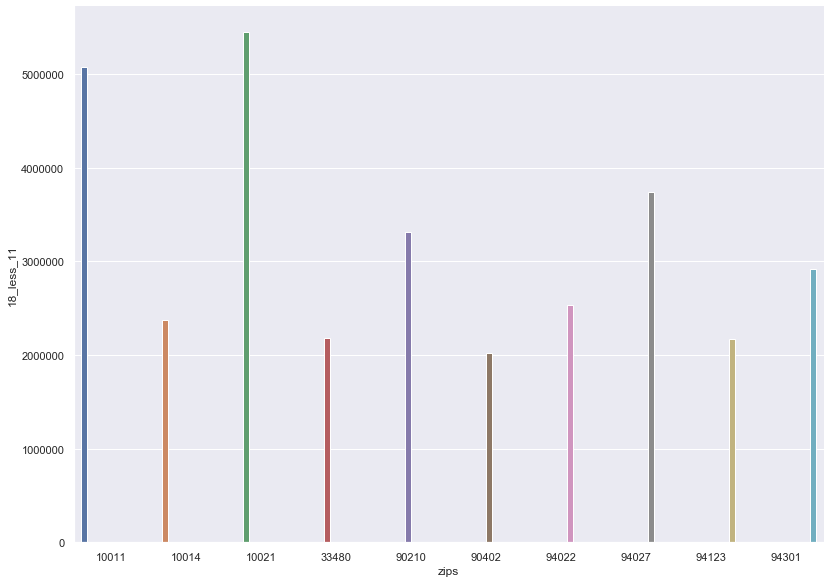

In [311]:
sns.catplot(x = 'zips', 
            y = '18_less_11', 
            data = top10, 
            hue = 'zips', 
            kind = 'bar', 
            height=8.27, 
            aspect=11.7/8.27);

In [ ]:
y2011_on_lineplot = sns.lineplot(x = y2011_on.index.get_level_values(0),
                                 y = 'value',
                                 data = y2011_on, 
                                 hue = y2011_on.index.get_level_values(1));

In [ ]:
fig2011 = y2011_on_lineplot.get_figure()    
fig2011.savefig('../viz/all_values_annual.png')